In [16]:
################## work with word clouds
library(ggplot2)
library(tm)
library(readr)
library(wordcloud)
library(plyr)
library(lubridate)

require(SnowballC)

d=read.csv("demonetization-tweets.csv")
head(d)



Loading required package: RColorBrewer

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:plotly':

    arrange, mutate, rename, summarise


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: SnowballC



,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
,<chr>,<lgl>,<int>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<lgl>,<lgl>
1,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;<85>,FALSE,0,NA,23/11/2016 18:40,FALSE,NA,8.01496e+17,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",HASHTAGFARZIWAL,331,TRUE,FALSE
2,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,FALSE,0,NA,23/11/2016 18:40,FALSE,NA,8.01496e+17,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",PRAMODKAUSHIK9,66,TRUE,FALSE
3,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization. If not for Aam Aadmi, listen to th<85>",FALSE,0,NA,23/11/2016 18:40,FALSE,NA,8.01496e+17,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",rahulja13034944,12,TRUE,FALSE
4,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9<85>,FALSE,0,NA,23/11/2016 18:39,FALSE,NA,8.01496e+17,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",deeptiyvd,338,TRUE,FALSE
5,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,FALSE,0,NA,23/11/2016 18:39,FALSE,NA,8.01495e+17,NA,"<a href=""http://cpimharyana.com"" rel=""nofollow"">CPIMBadli</a>",CPIMBadli,120,TRUE,FALSE
6,"@DerekScissors1: India<92>s #demonetization: #Blackmoney a symptom, not the disease https://t.co/HSl6Ihj0Qe via @ambazaarmag",FALSE,0,DerekScissors1,23/11/2016 18:39,FALSE,NA,8.01495e+17,2586266100,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",ambazaarmag,0,FALSE,FALSE


In [22]:
#install.packages('syuzhet')


also installing the dependencies 'textshape', 'dtt'





The downloaded binary packages are in
	/var/folders/3f/6pzn2nyn32d7wthyxkzsqyxcdrtvym/T//RtmpDVHbmG/downloaded_packages


In [17]:
text <- as.character(d$text)

sample <- sample(text, (length(text)))
corpus <- Corpus(VectorSource(list(sample)))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, stripWhitespace)
corpus <- tm_map(corpus, removeWords, stopwords('english'))
corpus <- tm_map(corpus, stemDocument)
dtm_up <- DocumentTermMatrix(VCorpus(VectorSource(corpus[[1]]$content)))

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, stemDocument):
"transformation drops documents"


Warning message in iconv(negative_words, "WINDOWS-1252", "UTF-8"):
"strings not representable in native encoding will be translated to UTF-8"
Warning message in iconv(negative_words, "WINDOWS-1252", "UTF-8"):
"input string 'Inane <a0> <a0> <a0> <a0>' cannot be translated to UTF-8, is it valid in 'UTF-8' ?"
Warning message in iconv(negative_words, "WINDOWS-1252", "UTF-8"):
"input string 'na<8b>ve' cannot be translated to UTF-8, is it valid in 'UTF-8' ?"
Warning message in iconv(negative_words, "WINDOWS-1252", "UTF-8"):
"input string 'Unswerving <a0> <a0> <a0><a0>' cannot be translated to UTF-8, is it valid in 'UTF-8' ?"
Warning message in iconv(negative_words, "WINDOWS-1252", "UTF-8"):
"input string 'Unwieldy <a0> <a0> <a0> <a0> <a0> <a0> <a0> <a0> <a0> <a0> <a0> <a0> <a0> <a0> <a0><a0>' cannot be translated to UTF-8, is it valid in 'UTF-8' ?"
Warning message in iconv(negative_words, "WINDOWS-1252", "UTF-8"):
"input string 'na<ef>ve' cannot be translated to UTF-8, is it valid in 'UTF-8'

[1] "Processing sentence: aaadhar"
[1] "Processing sentence: aaanupriyaaa"
[1] "Processing sentence: aadh"
[1] "Processing sentence: aadhaar"
[1] "Processing sentence: aadhaarbiometr"
[1] "Processing sentence: aadhar"
[1] "Processing sentence: aadityagautom"
[1] "Processing sentence: aadmi"
[1] "Processing sentence: aaj"
[1] "Processing sentence: aajtak"
[1] "Processing sentence: aakashhindocha"
[1] "Processing sentence: aakroshdin"
[1] "Processing sentence: aam"
[1] "Processing sentence: aamaaadmiparti"
[1] "Processing sentence: aamaadami"
[1] "Processing sentence: aamaadmi"
[1] "Processing sentence: aamaadmiparti"
[1] "Processing sentence: aamadmi"
[1] "Processing sentence: aamir"
[1] "Processing sentence: aamirkhan"
[1] "Processing sentence: aap"
[1] "Processing sentence: aapakhi"
[1] "Processing sentence: aapgujarat"
[1] "Processing sentence: aapharsh"
[1] "Processing sentence: aapkadepositgaya"
[1] "Processing sentence: aapkarajiv"
[1] "Processing sentence: aapko"
[1] "Processing 

Negative sentiments:  10144  Positive sentiments:  16606

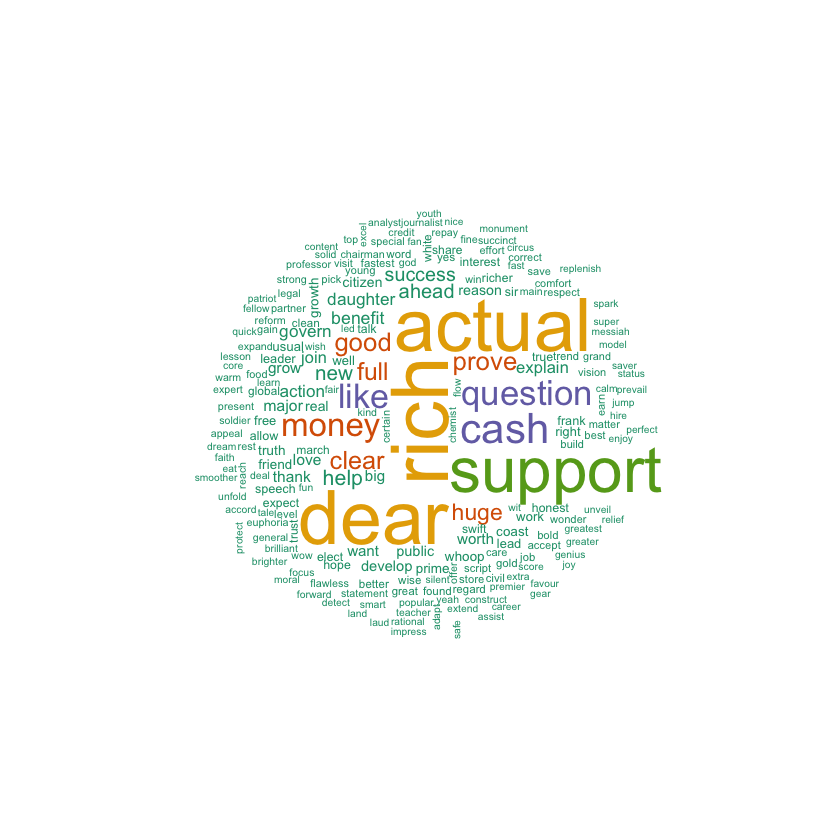

In [18]:
freq_up <- colSums(as.matrix(dtm_up))

require(RSentiment)

sentiments_up <- calculate_sentiment(names(freq_up))
#Analyses sentiment of a sentence in English and assigns score to sentiment

sentiments_up <- cbind(sentiments_up, as.data.frame(freq_up))
sent_pos_up <- sentiments_up[sentiments_up$sentiment=='Positive',]
sent_neg_up <- sentiments_up[sentiments_up$sentiment=='Negative',]
cat("Negative sentiments: ",sum(sent_neg_up$freq_up)," Positive sentiments: ",sum(sent_pos_up$freq_up))

wordcloud(sent_pos_up$text,sent_pos_up$freq,min.freq=5,random.order=FALSE,colors=brewer.pal(6,"Dark2"))

In [20]:
## carry out text data cleaning-gsub
some_txt<-gsub("(RT|via)((?:\\b\\w*@\\w+)+)","",d$text)
some_txt<-gsub("http[^[:blank:]]+","",some_txt)
some_txt<-gsub("@\\w+","",some_txt)
some_txt<-gsub("[[:punct:]]"," ",some_txt)
some_txt<-gsub("[^[:alnum:]]"," ",some_txt)


Attaching package: 'syuzhet'


The following object is masked from 'package:scales':

    rescale


Warning message:
"`filter_()` is deprecated as of dplyr 0.7.0.
Please use `filter()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Warning message:
"`group_by_()` is deprecated as of dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Warning message:
"`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


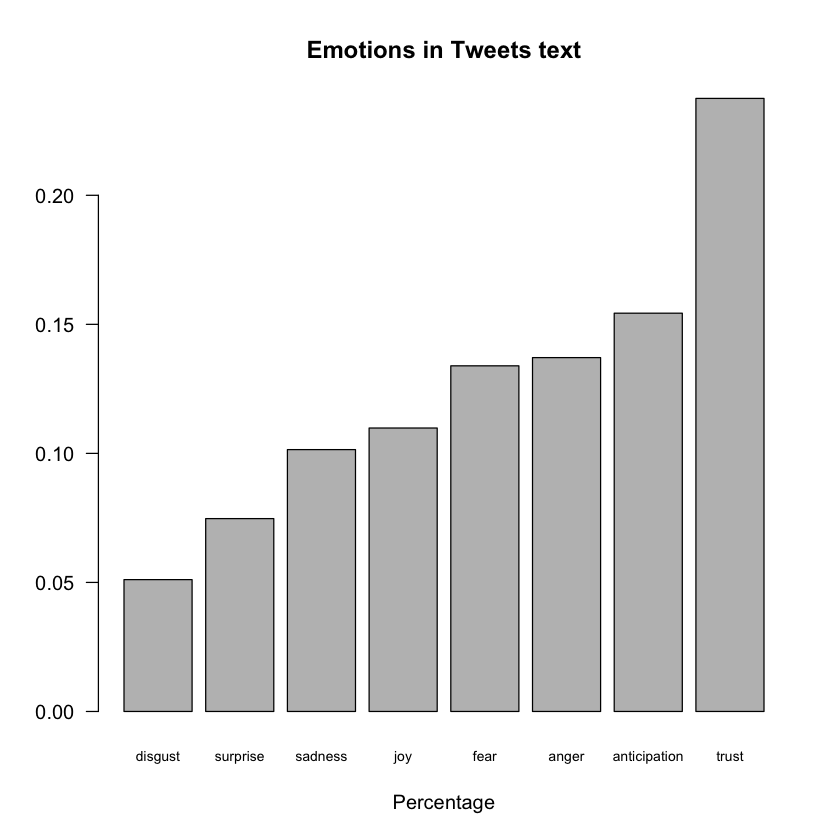

In [23]:
library(syuzhet)
tweetSentiment <- get_nrc_sentiment(some_txt)
#syuzhet pkg
#Calls the NRC sentiment dictionary to calculate the presence of 
#eight different emotions and their corresponding valence in a text file.

barplot(
  sort(colSums(prop.table(tweetSentiment[, 1:8]))), 
  #  horiz = TRUE, 
  cex.names = 0.7, 
  las = 1, 
  main = "Emotions in Tweets text", xlab="Percentage"
)
